# Analysis of the Indian start-up ecosystem based on funding from 2018–2021

## 1. Business understanding
### This project focuses on the funding received by start-ups in India from 2018 to 2021. The objective of this project is to provide insights to key stakeholders interested in venturing into the Indian startup ecosystem. To achieve this, we will be analyzing key metrics in funding received by startups in India from 2018 to 2021. These insights will be used by start-up management to make data-driven decisions about entering the Indian market.Management.

### This project is of the exploratory data analytic and visualization type, as it is our aim to deduce hidden insights and patterns from the dataset.

### Formulated question for our analysis

1.	To what extent do cities influence funding (amount, etc.)?
2.	Which industries are preferred by investors for funding?
3.	At which stage do start-ups get more funding from investors?
4.	What is the typical funding amount that startups receive in India?
5.	Which type of investors invest the most money?

### Hypothesis:

 - Null: The location of a startup doesn’t affect the amount of funding received from investors.

 - Alternate: the location of a startup significantly affects the amount of funding issued by investors

### To test this hypothesis, we will examine the distribution of tech start-ups across cities and deduce which cities have the most highly funded tech start-ups."


## 2. Data understanding
### This dataset contains funding information of the Indian startups from 2018 to August 2021.
### Column names and description:

- Company/Brand: Name of the company/start-up

- Founded: Year start-up was founded

- Sector: Sector of service

- What it does: Description about Company

- Founders: Founders of the Company

- Investor: Investors

- Amount($): Raised fund

- Stage: Round of funding reached

In [1]:
# installations
%pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip



 ### Python Libraries
 
 ### This section is to import all necessary libraries that will be used in the notebook

In [2]:
# Database access
import pyodbc
from dotenv import dotenv_values 

# Data handling and manipulation
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")
import seaborn as sns 
sns.set_style('whitegrid') # Set the style to 'whitegrid'
import plotly.express as px
import squarify

# statistical analysis 

from scipy import stats

from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm

#display all columns and rows 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# identify similar records
from fuzzywuzzy import fuzz, process

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# 3. Data preparation
## 3.1: Import Data

### This is an example of how the 2021 dataset was retrieved from the SQL Server database. The same process was used for the 2020 dataset, while 2018 and 2019 datasets were downloaded and imported.

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

In [4]:
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

In [5]:
# establish a connection to the SQL Server database using the specified parameters.
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection=pyodbc.connect(connection_string)

In [7]:
# fetch data from Server SQL database
query="Select * from dbo.LP1_startup_funding2021"
data2=pd.read_sql(query,connection)

In [8]:
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [9]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP1/India-startup-ecosytem-analysis/Datasets/data2021.csv"

In [10]:
# Save the data as a CSV file
data2.to_csv(file_path,  index=False)

In [11]:
# loading the 2021 dataset
data2021=pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Datasets\startup_funding2021.csv')
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [12]:
# # Get the dimensions of the DataFrame
data2021.shape

(1209, 9)

In [13]:
## get the the info of the DataFrame
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [14]:
# # Generate descriptive statistics
data2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [15]:
# Get the cardinality/number of unique values in each column
data2021.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [16]:
# Get the data types of each column
data2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [17]:
# Get the missing values of each column
data2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [18]:
# calculate the percentage of missing values in each column and sort them in descending order
data2021.isna().mean().sort_values(ascending=False)*100

Stage            35.401158
Investor          5.128205
Founders          0.330852
Amount            0.248139
Founded           0.082713
HeadQuarter       0.082713
Company_Brand     0.000000
Sector            0.000000
What_it_does      0.000000
dtype: float64

## 3.3 DATA CLEANING

### 3.3.1  Handle Inconsistencies

In [19]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### rename column names

In [20]:
# rename company/brand and Amount columns
data2021=data2021.rename(columns={'Company_Brand':'Company/Brand','Amount':'Amount($)'})
data2021.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

### check for consistency in each column

In [21]:
# count the occurrences of unique values in Company_brand column
data2021['Company/Brand'].value_counts().head(10)

Company/Brand
BharatPe            8
BYJU'S              4
CoinSwitch Kuber    3
Delhivery           3
Slice               3
Captain Fresh       3
Northern Arc        3
Jumbotail           3
MPL                 3
Spinny              3
Name: count, dtype: int64

In [22]:
# count the occurrences of unique values in Founded column
data2021['Founded'].value_counts().head(10)

Founded
2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
Name: count, dtype: int64

In [23]:
# remove the floats in founded year
# Replace non-finite values with median
data2021['Founded'] = data2021['Founded'].fillna(data2021['Founded'].mode().iloc[0])

# Convert the 'Founded' column to an integer data type
data2021['Founded'] = data2021['Founded'].astype(int)

In [24]:
data2021['Founded'].value_counts().head(10)

Founded
2020    238
2019    177
2018    143
2015    129
2016    118
2017    112
2021     76
2014     57
2011     34
2012     31
Name: count, dtype: int64

In [25]:
# count the occurrences of unique values in Headquarter column
data2021['HeadQuarter'].value_counts().head(20)

HeadQuarter
Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
Chennai                40
Noida                  34
Hyderabad              34
Jaipur                 11
Ahmedabad              11
Gurgaon                 7
Thane                   7
Ahmadabad               6
Kolkata                 5
Chandigarh              5
Haryana                 4
Gujarat                 3
Lucknow                 3
Coimbatore              3
Faridabad, Haryana      2
Name: count, dtype: int64

In [26]:
# a few entries do not appear to be cities. extract the first part of each value
# in the 'HeadQuarter' column before the comma
# Split values in 'HeadQuarter' column by comma
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.split(',').str[0]

# Replace non headquarter values with NaN in a column
data2021['HeadQuarter'] = data2021['HeadQuarter'].replace(['Pharmaceuticals\t#REF!', 'Food & Beverages', 'Computer Games','Online Media\t#REF!','Information Technology & Services'], np.nan)

# remove special characters
data2021['HeadQuarter'] = data2021['HeadQuarter'].str.replace('[\,#,!,]','')

In [27]:
# now lets look at the changes
data2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
                     ... 
Thiruvananthapuram      1
Roorkee                 1
Ambernath               1
Panchkula               1
Gandhinagar             1
Name: count, Length: 64, dtype: int64

In [28]:
# count the occurrences of unique values in Sector column
data2021['Sector'].value_counts().sort_values(ascending=False)

Sector
FinTech                          122
EdTech                           102
Financial Services                61
E-commerce                        37
Food & Beverages                  37
                                ... 
Business Supplies & Equipment      1
D2C jewellery                      1
Oil & Energy                       1
EV                                 1
Staffing & Recruiting              1
Name: count, Length: 254, dtype: int64

In [29]:
# there are inconsistencies in the sector column
# create a function to merge values based on name similarity to improve consistency
def merge_values_by_name_similarity(df, column_name, pattern, consistent_name):
    pattern_regex = '|'.join(pattern)
    df.loc[df[column_name].str.contains(pattern_regex, case=True, regex=True), column_name] = consistent_name
    return df

# Define the patterns and consistent names
patterns = [
    ['Health','care','HealthTech','Eyewear','Veterinary','Healthcare','Biotechnology','Pollution control equiptment', \
     'HeathTech','BioTechnology'], 
    ['Information Technology & services','Software','IT','SaaS','Cybersecurity','Tech Startup','Social network', \
     'Deeptech','SpaceTech','Internet','Drone','AI','Automation','Telecommunications','IoT','Analytics','Blockchain', \
    'Telecommunications','Computer & Network Security','Location Analytics','Nanotechnology','MLOps platform', \
     'Augmented reality','Legaltech','AR startup','Networking','CRM','Information Services','Defense & Space', \
     'Telecommuncation','Deep Tech','Information Technology','Robotics','Computer software','Tech startup','LegalTech', \
    'Consumer software'], 
    ['Food','Food & Beverages','Cloud kitchen','Beverages','Food Production','Food delivery','Food Industry'],
    ['E-commerce','Social commerce','D2C','B2B E-commerce','Content commerce'],
    ['FinTech','Financial Services','Insurance','Insuretech','Finance','Crypto','Banking','Investment Management', \
     'Capital Markets','Venture Capital','Private Equity','Digital mortgage','Investment Banking','Equity Management', \
    'Cryptocurrency','Trading platform','Innovation Management','Venture capitalist','NFT Marketplace','InsureTech', \
    'Innovation management'],
    ['AgriTech','Farming','Fishery'],
    ['Consumer Goods','Retail','Consumer Electronics','Furniture','Electronics','Arts & Crafts','Wine & Spirits', \
     'Commerce','Business Supplies & Equipment','Bike Rental','Wholesale','Sales and Distribution','Tobacco', \
     'Furniture Rental','Milk startup','B2B Marketplace','Cannabis startup','Merchandise','Marketing','Consumer goods'],
    ['EdTech','E-learning','Education Management','Higher Education','Skill development','Education'],
    ['Automotive','Industrial Automation','EV','Textiles','Product studio','Vehicle repair startup','Manufacturing', \
    'B2B Manufacturing','Automobile'],
    ['OTT','Media','Online Media','Social Media','Gaming','Music','Entertainment','Computer Games','NFT', \
     'Social platform','Cultural','Video communication','Content creation','Translation & Localization','MarTech', \
     'Mobile Games','Podcast','Social audio','Blogging','Celebrity Engagement','Content publishing', \
     'Online storytelling','Digital platform','Advertisement','Social media'],
    ['Health,Wellness & Fitness','Apparel & Fashion','Fashion','Cosmetics','D2C Fashion','Beauty products', \
     'Fashion and lifestyle','Clothing','FemTech','Interior Design','B2B Travel ','Foootwear','D2C jewellery', \
     'Home Decor','Nutrition','Fitness','Femtech','Personal Care'],
    ['Supply Chain','Logistics','Mobility','Transportation','Maritime','Aviation & Aerospace','TaaS startup','Aviation', \
     'Aeorspace','Supply chain platform'],
    ['Hospitality','Tourism','Hospitality'],
    ['Real Estate','Construction','Design','Rental','Housing Marketplace','Commercial Real Estate','Real estate'],
    ['Renewable','Energy','Solar','Oil & Energy','CleanTech','Battery'],
    ['Human Resources','Recruitment','HR Tech','Co-working','Job discovery platform','Staffing & Recruiting','HRTech'],
    ['Consulting','Consumer Services','Marketing & Advertising','Dating','B2B','Professional Training & Coaching', \
     'Home services','Water purification','Company-as-a-Service','Matrimony','Management Consulting','Spiritual', \
     'Legal Services','Community','Advisory firm','Delivery service','Environmental Services','Facilities Services', \
    'Social community','Environmental service','Consumer service'],
    ['sports','SportsTech','Fantasy sports','Sports startup'],
    ['Mechanical Or Industrial Engineering','Engineering','Mechanical & Industrial Engineering'],

]


consistent_names = ['Healthcare', 'Technology', 'Food & Beverages','E-commerce','Finance','Agriculture','Retail', \
                    'Education','Manufacturing','Media & Entertainment','Lifestyle','Transportation & Logistics', \
                    'Hospitality','Real Estate','Energy','Human Resources','Services','Sports', 'Engineering']

# Apply the function for the flattened patterns and consistent names
for pattern, consistent_name in zip(patterns, consistent_names):
    data2021 = merge_values_by_name_similarity(data2021, 'Sector', pattern, consistent_name)

# Display the updated column
print(data2021['Sector'].value_counts())

Sector
Finance                                                                                                       225
Technology                                                                                                    189
Education                                                                                                     134
Healthcare                                                                                                    133
Retail                                                                                                         74
Media & Entertainment                                                                                          65
E-commerce                                                                                                     52
Transportation & Logistics                                                                                     51
Food & Beverages                                                                 

In [30]:
# Check for other similar names with a similarity ratio of at least 80 and replace with a consistent name
# Define the threshold similarity ratio
threshold = 80

# Iterate over each name in the sector column
for i, name in enumerate(data2021['Sector']):
    # Compare the current name with all the other names in the column
    matches = process.extractBests(name, data2021['Sector'], scorer=fuzz.ratio, score_cutoff=threshold)
    
    # Check if there are any similar names
    if len(matches) > 1:
        # Replace the similar names with a consistent name (the first name in the list)
        data2021.loc[i, 'Sector'] = matches[0][0]

# Display the updated sector column
print(data2021['Sector'].value_counts())


Sector
Finance                                                                                                       225
Technology                                                                                                    189
Education                                                                                                     134
Healthcare                                                                                                    133
Retail                                                                                                         74
Media & Entertainment                                                                                          65
E-commerce                                                                                                     52
Transportation & Logistics                                                                                     51
Food & Beverages                                                                 

In [31]:
# removing inconsistent names in the sector column
# checking to see what the company does to replace the sector
data2021.query('Sector =="Hauz Khas"')


,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
241,MasterChow,2020,NaN,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020,NaN,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [32]:
# checking another record to see what the company does to replace the sector
data2021.query('Sector =="Manchester, Greater Manchester"')

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
1176,Peak,2014,NaN,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [33]:
# replacing the inconsistent names in the sector column with what the company does
data2021['Sector']=data2021['Sector'].replace(['Hauz Khas','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','Manchester, Greater Manchester'],['Food & Beverages','Media & Entertainment','Technology'])

In [34]:
# lets see the final categorization of sector column
data2021['Sector'].value_counts()

Sector
Finance                       225
Technology                    190
Education                     134
Healthcare                    133
Retail                         74
Media & Entertainment          66
E-commerce                     52
Transportation & Logistics     51
Food & Beverages               49
Manufacturing                  45
Services                       44
Lifestyle                      36
Agriculture                    26
Real Estate                    21
Human Resources                18
Energy                         17
Hospitality                    13
Sports                         12
Engineering                     3
Name: count, dtype: int64

In [35]:
# count the occurrences of unique values in Amount column
data2021['Amount($)'].value_counts().sort_values(ascending=False)

Amount($)
$Undisclosed    73
$1000000        52
Undisclosed     43
$2000000        40
$1,000,000      33
                ..
$600000000       1
$19000000        1
$175000000       1
$5700000         1
$55000000        1
Name: count, Length: 278, dtype: int64

In [36]:
# there are inconsistencies in the amount column
# remove special characters($ sign)
data2021['Amount($)'] = data2021['Amount($)'].str.replace('[$,,]','', regex=True)
# remove any non-digit characters from the 'Amount($)' column
data2021['Amount($)'] = data2021['Amount($)'].str.replace(r'\D+','', regex=True)
# convert empty space to nan
data2021['Amount($)'] = data2021['Amount($)'].replace('',np.nan)
# convert column to numeric
data2021["Amount($)"] = pd.to_numeric(data2021["Amount($)"], errors='coerce')
data2021['Amount($)'].value_counts()

Amount($)
1000000.0      85
2000000.0      60
3000000.0      48
10000000.0     43
5000000.0      41
               ..
265000.0        1
111000000.0     1
10000.0         1
130000.0        1
55000000.0      1
Name: count, Length: 197, dtype: int64

In [37]:
# count the occurrences of unique values in Stage column
data2021['Stage'].value_counts().sort_values(ascending=False)

Stage
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
Pre-series A1      4
$1200000           2
Bridge             2
Series G           2
Series H           2
$300000            2
Pre-series         2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
Series A2          1
Series I           1
Name: count, dtype: int64

In [38]:
# the stage has inconsistencies
# remove special characters($ sign)
data2021['Stage'] = data2021['Stage'].str.replace('[$,,]','', regex=True)
# remove any digit characters from the 'Stage' column
data2021['Stage'] = data2021['Stage'].str.replace(r'\d+','', regex=True)
# replace empty spaces with np.nan
data2021['Stage'] = data2021['Stage'].replace('', np.nan)
# replace nan with 'unknown'
data2021['Stage'] = data2021['Stage'].replace(np.nan, 'Unknown')

data2021['Stage'].value_counts()

Stage
Unknown         434
Seed            246
Pre-series A    161
Series A        127
Series B         50
Pre-seed         47
Series C         45
Debt             27
Series D         22
Series E         18
Pre-series B     10
Series F          8
Series G          2
Pre-series        2
Series H          2
Bridge            2
Series A+         1
PE                1
Early seed        1
Seies A           1
Seed+             1
Series I          1
Name: count, dtype: int64

In [39]:
# group stage categories 
data2021['Stage']=data2021['Stage'].apply(str)

    #Define a function for recategorization
def recategorize(stage):
    if stage in ['Angel Round','Pre seed Round']:
        return 'Angel'
    elif stage in ['Seed','Seed+']:
        return 'Seed'
    elif stage in ['Pre-seed','Pre-Seed','Early seed']:
        return 'Pre-Seed'
    elif stage in ['Pre-series A','Pre-series','Bridge']:
        return 'Pre-Series'
    elif stage in ['Series A','Pre-series B','Pre-Series B','Series A-1','Seies A','Series A+']:
        return 'Series A'
    elif stage in ['Series B','Pre-series C','Series B2','Pre series C','Mid series']:
        return 'Series B'
    elif stage in ['Series C']:
        return 'Series C'
    elif stage in ['PE']:
        return 'Equity'
    elif stage in ['Series E','Series D','Series F','Edge','Series H','Series E2','Series D1','Series I','Series G']:
        return 'Later Stage'
    elif stage in ['Debt']:
        return 'Debt Financing'
    elif stage in ['unknown']:
        return 'Unknown Stage'
    else:
        return stage
    
data2021['Stage'] = data2021['Stage'].apply(recategorize)

data2021['Stage'].unique()

array(['Pre-Series', 'Unknown', 'Later Stage', 'Series C', 'Seed',
       'Series B', 'Pre-Seed', 'Series A', 'Debt Financing', 'Equity'],
      dtype=object)

In [40]:
# lets see the final categorization of stage column
data2021['Stage'].value_counts()

Stage
Unknown           434
Seed              247
Pre-Series        165
Series A          139
Later Stage        53
Series B           50
Pre-Seed           48
Series C           45
Debt Financing     27
Equity              1
Name: count, dtype: int64

In [41]:
# count the occurrences of unique values in Founders column
data2021['Founders'].value_counts().sort_values(ascending=False)

Founders
Ashneer Grover, Shashvat Nakrani                        7
Byju Raveendran, Divya Gokulnath                        5
Bhavish Aggarwal                                        4
Ritesh Agarwal                                          4
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari         3
                                                       ..
Adarsh Anand, Amit Tiwari                               1
Madhav Krishna                                          1
Sai Srinivas Kiran GV, Shubh Malhotra                   1
O.P. Godara, Vivek Pathak, Kapil Arya, Sharad Bansal    1
Vishal Chopra, Himanshu Gupta                           1
Name: count, Length: 1095, dtype: int64

In [42]:
missing_rows=data2021[data2021['Founders'].isnull()]
missing_rows

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
274,ByteLearn,2021,Noida,Education,AI powered teaching assistant for 100 Mn teach...,NaN,"Aditya Singhal, Nishant Sinha",9500000.0,Seed
558,The Sleep Company,2019,Mumbai,Retail,Patent Pending sleep technology developed by a...,NaN,Fireside Ventures,1000000.0,Pre-Series
1095,PredictiVu,2020,Gurugram,Services,PredictiVu's AI-enabled dashboard integrated w...,NaN,Kunal Sarkar,1500000.0,Pre-Seed
1187,NeuroPixel.AI,2020,Bangalore,Technology,NeuroPixel.AI Labs is a deep tech start-up tha...,NaN,"Arvind Venugopal Nair, Amritendu Mukherjee",800000.0,Seed


In [43]:
# count the occurrences of unique values in Investor column
data2021['Investor'].value_counts().sort_values(ascending=False)

Investor
Inflection Point Ventures                   24
Venture Catalysts                           11
Tiger Global                                11
Elevation Capital                            7
Titan Capital                                6
                                            ..
Omidyar Network India, Chiratae Ventures     1
Elevation Capital, Accel India               1
Legatum Capital                              1
1000000\t#REF!                               1
3one4 Capital, Kalaari Capital               1
Name: count, Length: 937, dtype: int64

## 3.3.2 Imputing Missing values

In [44]:
# check missing values
data2021.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        9
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)        153
Stage              0
dtype: int64

In [45]:
#select object variables
obj=data2021.select_dtypes(include='object')
obj.columns


Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders',
       'Investor', 'Stage'],
      dtype='object')

In [46]:
obj= ['Founders','HeadQuarter','Investor']

In [47]:
# use mode to impute missing value in object columns
data2021[obj]=data2021[obj].fillna(data2021[obj].mode().iloc[0])

In [48]:
# select num columns
num=data2021.select_dtypes(exclude='object')
num.columns

Index(['Founded', 'Amount($)'], dtype='object')

In [49]:
num=['Amount($)']

In [50]:
# use median to impute numerical columns ignoring the Nan values to calculate the median
data2021[num]=data2021[num].fillna(data2021[num].median(skipna=True))

In [51]:
data2021.isnull().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [52]:
data2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-Series
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Unknown
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Later Stage
3,Bizongo,2015,Mumbai,E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,Finance,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


## 3.3.3 outliers in numeric column

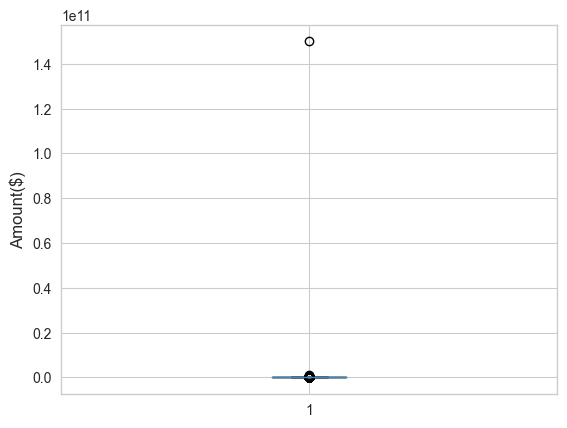

In [53]:
# Checking for outliers in the amount column
# Create a box plot
plt.boxplot(data2021['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

## 3.3.4 duplicates

In [54]:
# checking for duplicates
data2021.duplicated().sum()

19

In [55]:
# lets have a look at rows with duplicates
data2021.loc[data2021.duplicated()]

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
109,Bewakoof,2012,Mumbai,Lifestyle,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Unknown
111,FanPlay,2020,Bangalore,Media & Entertainment,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",3500000.0,Unknown
117,Advantage Club,2014,Mumbai,Human Resources,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Unknown
119,Ruptok,2020,New Delhi,Finance,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,Unknown
243,Trinkerr,2021,Bangalore,Finance,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A
244,Zorro,2021,Gurugram,Technology,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed
245,Ultraviolette,2021,Bangalore,Manufacturing,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C
246,NephroPlus,2009,Hyderabad,Healthcare,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Later Stage
247,Unremot,2020,Bangalore,Technology,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed


In [56]:
# checking an example of a duplicate
data2021.query('`Company/Brand`=="Curefoods"')

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Unknown


In [57]:
# checking another example of a duplicate
data2021.query('`Company/Brand` =="Fullife Healthcare"')

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,Bangalore,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown
256,Fullife Healthcare,2009,Bangalore,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,3500000.0,Unknown


In [58]:
# rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2021=data2021.loc[~data2021.duplicated(subset=['Company/Brand','Founded','Founders','Investor','Amount($)'])].reset_index(drop=True).copy()

In [59]:
# unique rows and columns
data2021.shape

(1180, 9)

In [60]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP1/India-startup-ecosytem-analysis/Datasets/clean_data2021.csv"

In [61]:
# Save the data as a CSV file
data2021.to_csv(file_path,  index=False)

## 3.3.5 FINAL DATASET

### After the data cleaning process, all datasets were concatenated and merged into 1 dataframe with 2873 rows and 8 columns in total. The top 5 and last 5 records of the dataset are as follows;

In [62]:
# loading 2018, 2019 and 2020 cleaned datasets to merge with the 2021 dataset
data_18 = pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Clean Datasets\IndiaClean_2018_data.csv')
data_19 = pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Clean Datasets\IndiaClean_2019_data.csv')
data_20 = pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Clean Datasets\IndiaClean_2020_data.csv')


In [63]:
#  display information about the data structure and contents of the "data_18" DataFrame
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  524 non-null    object 
 1   Stage          524 non-null    object 
 2   Amount($)      524 non-null    float64
 3   Location       524 non-null    object 
 4   What_it_does   524 non-null    object 
 5   Sector         524 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.7+ KB


In [64]:
# renaming the location column in the 2018 dataset
data_18.rename(columns={'Location':'HeadQuarter'},inplace=True)
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  524 non-null    object 
 1   Stage          524 non-null    object 
 2   Amount($)      524 non-null    float64
 3   HeadQuarter    524 non-null    object 
 4   What_it_does   524 non-null    object 
 5   Sector         524 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.7+ KB


In [65]:
#  display information about the data structure and contents of the "data_19" DataFrame
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     89 non-null     int64  
 1   Company/Brand  89 non-null     object 
 2   Founded        89 non-null     float64
 3   HeadQuarter    89 non-null     object 
 4   Sector         89 non-null     object 
 5   What_it_does   89 non-null     object 
 6   Founders       89 non-null     object 
 7   Investor       89 non-null     object 
 8   Amount($)      89 non-null     float64
 9   Stage          89 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


In [66]:
# droping the unnamed column
data_19 = data_19.drop('Unnamed: 0',axis = 1)
data_19.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [67]:
#  display information about the data structure and contents of the "data_20" DataFrame
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   Founded        1055 non-null   int64  
 2   HeadQuarter    1055 non-null   object 
 3   Sector         1055 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1055 non-null   object 
 6   Investor       1055 non-null   object 
 7   Amount($)      1055 non-null   float64
 8   Stage          1055 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 74.3+ KB


In [68]:
# add a funding year to all datasets
data_18['Funding_Year'] = "2018"
data_19['Funding_Year'] = "2019"
data_20['Funding_Year'] = "2020"
data2021['Funding_Year'] = "2021"


In [69]:
 # merging the datasets

df = pd.concat([data_18, data_19, data_20, data2021])

In [70]:
# save the merged dataset
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP1/India-startup-ecosytem-analysis/Clean Datasets/Clean_Combined_data.csv"

In [71]:
# Save the data as a CSV file
df.to_csv(file_path,  index=False)

In [72]:
# read the new combined data
df=pd.read_csv(r'C:\Users\user\Desktop\LP1\India-startup-ecosytem-analysis\Clean Datasets\Clean_Combined_data.csv')

In [73]:
#  display information about the data structure and contents of the combined DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2848 non-null   object 
 1   Stage          2848 non-null   object 
 2   Amount($)      2848 non-null   float64
 3   HeadQuarter    2848 non-null   object 
 4   What_it_does   2848 non-null   object 
 5   Sector         2848 non-null   object 
 6   Funding_Year   2848 non-null   int64  
 7   Founded        2324 non-null   float64
 8   Founders       2324 non-null   object 
 9   Investor       2324 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 222.6+ KB


## 3.4 Exploratory Data Analysis: EDA
### in this section we inspect the datasets in depth and conduct a univariate, bivariate and multivariate analysis and test the hypothesis to further understand the patterns and trends in the dataset.

In [74]:
# fill the empty entries in the Founded, Founders and Investor columns. 
# these missing values are as a result of the absence of these three columns in the 2018 dataset
# lets fill the missing values in the founded column with mode and fill founders and investor columns with 'unknown'
df['Founded'].fillna(df['Founded'].mode() .iloc[0],inplace=True)
df['Founders'].fillna('unknown',inplace=True)
df['Investor'].fillna('unknown',inplace=True)

In [75]:
df.head(5)

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
0,TheCollegeFever,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Media & Entertainment,2018,2016.0,unknown,unknown
1,Happy Cow Dairy,Seed,1000000.0,Mumbai,A startup which aggregates milk from dairy far...,Agriculture,2018,2016.0,unknown,unknown
2,MyLoanCare,Series A,1000000.0,Gurgaon,Leading Online Loans Marketplace in India,Finance,2018,2016.0,unknown,unknown
3,PayMe India,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Finance,2018,2016.0,unknown,unknown
4,Eunimart,Seed,1000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,E-commerce,2018,2016.0,unknown,unknown


In [76]:
# lets check the number of rows and columns in the combined dataframe
df.shape

(2848, 10)

In [77]:
# lets check the statistics
df.describe( include= 'all')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
count,2848,2848,2.848000e+03,2848,2848,2848,2848.000000,2848.000000,2848,2848
unique,2213,15,NaN,124,2688,25,NaN,NaN,1982,1778
top,BharatPe,Seed,NaN,Bangalore,Provides online learning classes,Technology,NaN,NaN,unknown,unknown
freq,10,689,NaN,978,5,554,NaN,NaN,536,562
mean,NaN,NaN,9.837547e+07,NaN,NaN,NaN,2020.015098,2016.034410,NaN,NaN
std,NaN,NaN,3.102321e+09,NaN,NaN,NaN,1.087068,3.739997,NaN,NaN
min,NaN,NaN,7.500000e+03,NaN,NaN,NaN,2018.000000,1963.000000,NaN,NaN
25%,NaN,NaN,1.000000e+06,NaN,NaN,NaN,2020.000000,2015.000000,NaN,NaN
50%,NaN,NaN,3.000000e+06,NaN,NaN,NaN,2020.000000,2016.000000,NaN,NaN
75%,NaN,NaN,7.225000e+06,NaN,NaN,NaN,2021.000000,2018.000000,NaN,NaN


### From the statistics above, we only have one numeric column and the rest are objects. the difference in the standard deviation and mean indicates that the values in the Amount column are more dispersed, and there is a greater deviation from the average value. This suggests that the variability or dispersion of the data is high, and there is a wider range of values in the column. Also imputation of the empty emtries in the Founded, Founders and Investor columns to unknown has affected the frequency of these columns.

In [78]:
# lets check for missing values 
df.isnull().sum()


Company/Brand    0
Stage            0
Amount($)        0
HeadQuarter      0
What_it_does     0
Sector           0
Funding_Year     0
Founded          0
Founders         0
Investor         0
dtype: int64

In [79]:
df['Sector'].unique()

array(['Media & Entertainment', 'Agriculture', 'Finance', 'E-commerce',
       'Technology', 'Lifestyle', 'Services',
       'Transportation & Logistics', 'Engineering', 'Food & Beverage',
       'Healthcare', 'Education', 'Retail', 'Energy', 'Hospitality',
       'Sports', 'Real Estate', 'Manufacturing', 'Human Resources',
       'Health', 'Marketing and Advertising', 'Food and Beverages',
       'Marketing and advertising', 'Accomodation', 'Food & Beverages'],
      dtype=object)

In [80]:
# replacing similar names in the sector column
df['Sector']=df['Sector'].replace(['Marketing and advertising','Food and Beverages','Food & Beverage','Health','Accomodation','Marketing and Advertising'],['Services','Food & Beverages','Food & Beverages','Healthcare','Hospitality','Services'])

In [81]:
df['Sector'].value_counts()

Sector
Technology                    554
Finance                       477
Education                     295
Healthcare                    281
E-commerce                    177
Media & Entertainment         141
Transportation & Logistics    135
Food & Beverages              135
Retail                        104
Agriculture                    91
Services                       89
Lifestyle                      89
Manufacturing                  76
Real Estate                    51
Hospitality                    37
Human Resources                34
Engineering                    31
Energy                         27
Sports                         24
Name: count, dtype: int64

In [82]:
# lets check for duplicates
df.duplicated().sum()

3

In [83]:
# check the duplicate rows
df.loc[df.duplicated()]

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
758,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
818,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
975,Byju’s,Unknown Stage,500000000.0,Bangalore,An Indian educational technology and online tu...,Education,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management"


In [84]:
# checking an example of a duplicate
df.query('`Company/Brand`=="Krimanshi"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
742,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
758,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
1554,Krimanshi,Unknown Stage,20000.0,Jodhpur,Sustainable system to feed animals by valorizi...,Agriculture,2020,2016.0,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet


In [85]:
# checking another example of a duplicate
df.query('`Company/Brand`=="Nykaa"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
511,Nykaa,Equity,1000000.0,Mumbai,Nykaa.com is a premier online beauty and welln...,Lifestyle,2018,2016.0,unknown,unknown
733,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
818,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
826,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,E-commerce,2020,2012.0,Falguni Nayar,"Katrina Kaif, Steadview Capital"
953,Nykaa,Unknown Stage,24700000.0,Mumbai,Cosmetics & beauty products online,Lifestyle,2020,2012.0,Falguni Nayar,Steadview Capital
1325,Nykaa,Unknown Stage,8800000.0,Mumbai,Deals in cosmetic and wellness products,E-commerce,2020,2012.0,Falguni Nayar,Steadview capital
1426,Nykaa,Unknown Stage,13137000.0,Mumbai,Deals in cosmetic and wellness products,E-commerce,2020,2012.0,Falguni Nayar,Steadview capital


In [86]:
# checking another example of a duplicate
df.query('`Company/Brand`=="Byju’s"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
939,Byju’s,Unknown Stage,500000000.0,Bangalore,An Indian educational technology and online tu...,Education,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management"
975,Byju’s,Unknown Stage,500000000.0,Bangalore,An Indian educational technology and online tu...,Education,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management"


In [87]:
# locking rows without duplicates
# remove duplicate rows based on the specified subset of columns
df=df.loc[~df.duplicated(subset=['Sector','Company/Brand','Stage','Amount($)','HeadQuarter','What_it_does','Founded','Founders','Investor'])].reset_index(drop=True).copy()

In [88]:
# lets confirm weather we still have any duplicates
df.duplicated().sum()

0

In [89]:
# lets see the new DataFrame shape
df.shape

(2845, 10)

## 3.5 Feature Processing
### we have a business question that aims to answer whether the age of the startup affects funding. Hence, we need to add a new column which calculates this age by subtracting the funding year from the year the startup was founded.

In [90]:
# create a new attribute called startup age 
df["Startup_Age"] = abs(df["Funding_Year"] - df["Founded"])

In [91]:
df.head(5)

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor,Startup_Age
0,TheCollegeFever,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Media & Entertainment,2018,2016.0,unknown,unknown,2.0
1,Happy Cow Dairy,Seed,1000000.0,Mumbai,A startup which aggregates milk from dairy far...,Agriculture,2018,2016.0,unknown,unknown,2.0
2,MyLoanCare,Series A,1000000.0,Gurgaon,Leading Online Loans Marketplace in India,Finance,2018,2016.0,unknown,unknown,2.0
3,PayMe India,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Finance,2018,2016.0,unknown,unknown,2.0
4,Eunimart,Seed,1000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,E-commerce,2018,2016.0,unknown,unknown,2.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2845 non-null   object 
 1   Stage          2845 non-null   object 
 2   Amount($)      2845 non-null   float64
 3   HeadQuarter    2845 non-null   object 
 4   What_it_does   2845 non-null   object 
 5   Sector         2845 non-null   object 
 6   Funding_Year   2845 non-null   int64  
 7   Founded        2845 non-null   float64
 8   Founders       2845 non-null   object 
 9   Investor       2845 non-null   object 
 10  Startup_Age    2845 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 244.6+ KB


## 4. Modeling
## 4.1 VISUALIZATION

### 4.2 UNIVARIATE ANALYSIS
### 4.2.1 Analysis of the Amount attribute

In [93]:
# show the column statistics
df['Amount($)'].describe()

count    2.845000e+03
mean     9.830219e+07
std      3.103947e+09
min      7.500000e+03
25%      1.000000e+06
50%      3.000000e+06
75%      7.200000e+06
max      1.500000e+11
Name: Amount($), dtype: float64

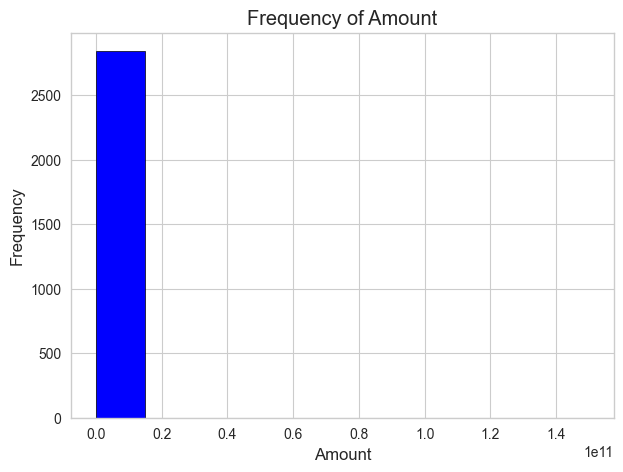

In [94]:
# now lets show the frequency distribution
plt.figure(figsize=(7,5))
plt.hist(df['Amount($)'],bins=10, color='blue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency of Amount')
plt.show();

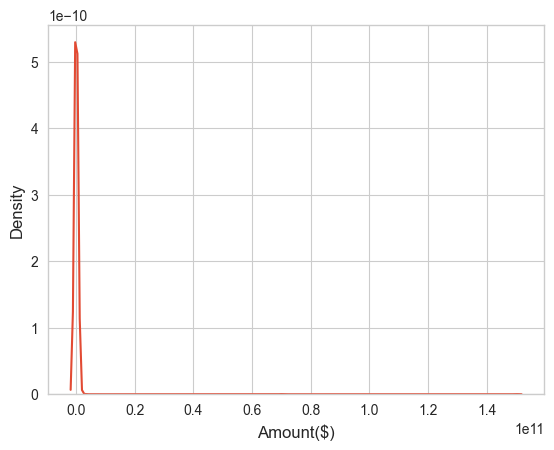

In [95]:
# lets plot a distribution plot to show the skewness in detail
sns.kdeplot(x='Amount($)',data=df);

### The distribution plot shows in detail the skewness of the Amount attribute of the dataset and it indicates a positively skewed distribution.

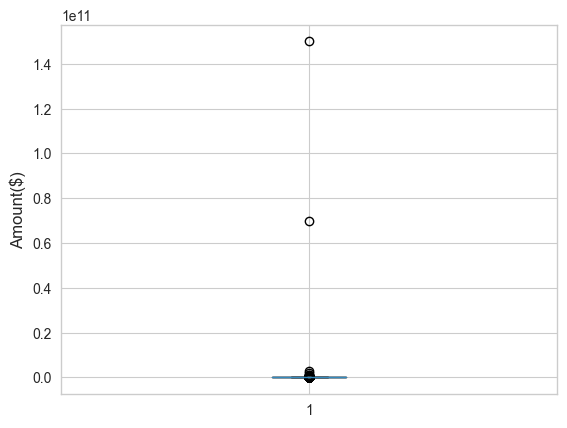

In [96]:
# lets Create a box plot to have a look at the outliers in the amount attribute
plt.boxplot(df['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

### the "Amount" column contains outliers which need to be removed before moving further. Here's how to remove the outliers:

In [97]:
# Calculate the IQR
Q1 = df['Amount($)'].quantile(0.25)
Q3 = df['Amount($)'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
df = df[(df['Amount($)'] >= lower_bound) & (df['Amount($)'] <= upper_bound)]

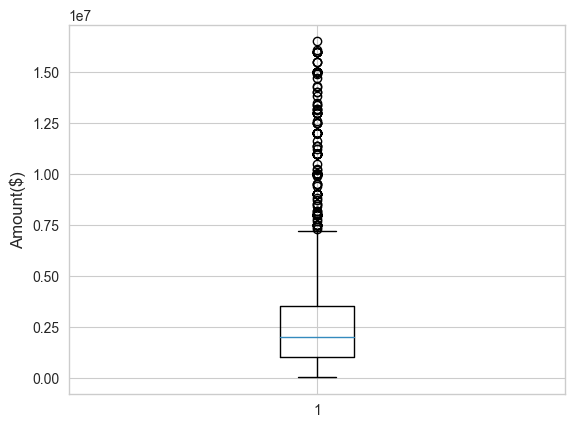

In [98]:
#  box plot after removing the outliers in the amount attribute
plt.boxplot(df['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

In [99]:
df.shape

(2373, 11)

### 4.2.2 Analysis of the company attribute

In [100]:
# now lets have a look at the distribution of company column:
company_count = df['Company/Brand'].value_counts().head(5)
company_count

Company/Brand
Nykaa        5
BharatPe     5
Origo        4
Instoried    4
Eggoz        4
Name: count, dtype: int64

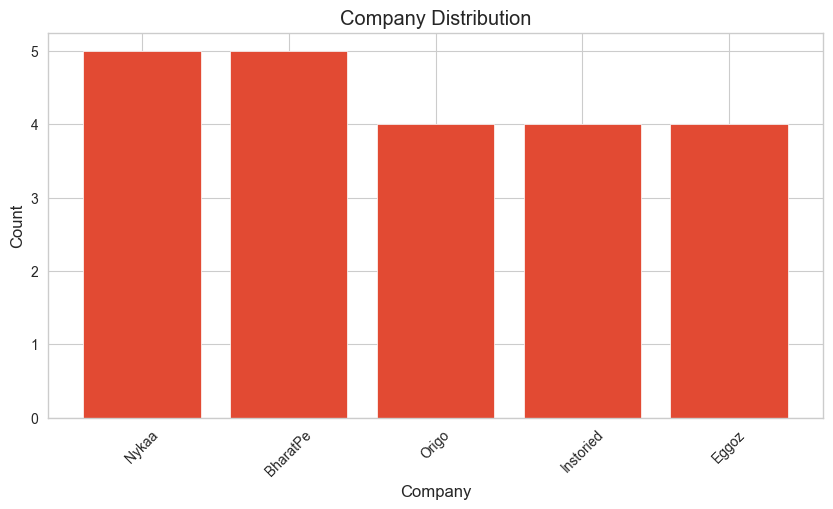

In [101]:
# lets see the distribution of the first 10 companies
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(company_count.index,company_count.values, align='center')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Distribution')
plt.show();

### Nykaa and BharatPe companies have the highest number of startups 

### 4.2.3 Analysis of the location attribute

In [102]:
# now lets have a look at the distribution of company column:
location_count = df['HeadQuarter'].value_counts().head(5)
location_count

HeadQuarter
Bangalore    767
Mumbai       388
New Delhi    202
Gurugram     185
Chennai       92
Name: count, dtype: int64

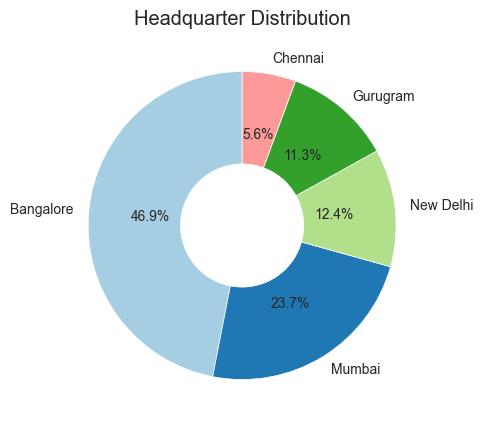

In [103]:
# lets see the distribution of the top 5 locations
fig, ax = plt.subplots(figsize=(10, 5))
# Draw the outer pie chart
outer_colors = plt.cm.Paired(range(len(location_count)))
ax.pie(location_count.values, labels=location_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
# Draw the inner pie chart to create the doughnut effect
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Headquarter Distribution')
plt.show()

### Bangalore, Mumbai, and New Delhi cities contain the highest number of startups

### 4.2.4 Analysis of the Sector attribute

In [104]:
# now lets have a look at the distribution of the sector column:
sector_count = df['Sector'].value_counts().head(5)
sector_count

Sector
Technology    490
Finance       369
Education     250
Healthcare    246
E-commerce    138
Name: count, dtype: int64

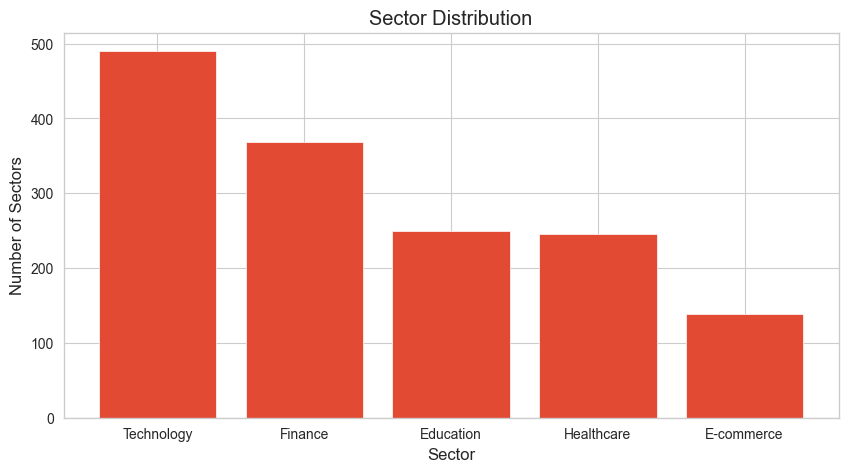

In [105]:
# lets see the distribution of the top 10 sectors
plt.figure(figsize=(10,5))
plt.xticks(rotation=0)
plt.bar(sector_count.index,sector_count.values, align='center')
plt.xlabel('Sector')
plt.ylabel('Number of Sectors')
plt.title('Sector Distribution')
plt.show();

### The top 5 sectors are Technology, Finance and Education, Healthcare and E-commerce sectors

### 4.2.5 Analysis of the Stage attribute

In [106]:
# Lets look at the unique values in the stage column
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C', 'Pre-series A', 'Seed funding', 'Pre-Series',
       'Unknown'], dtype=object)

In [107]:
# replace similar categories in stage column
df['Stage']=df['Stage'].replace('Unknown Stage','Unknown')

In [108]:
# now lets have a look at the distribution of the sector column:
# Filter out the rows with 'unknown' in the 'Stage' column
filtered_df = df[df['Stage'] != 'Unknown']
# Get the value counts of the 'Stage' column and select the top 5 values
stage_count = filtered_df['Stage'].value_counts().head(5)
stage_count


Stage
Seed          682
Series A      287
Pre-Series    229
Pre-Seed      121
Series B       77
Name: count, dtype: int64

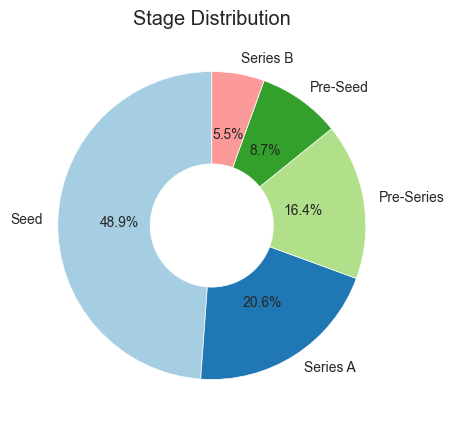

In [109]:
# lets see the distribution of the top 5 funding stages
fig, ax = plt.subplots(figsize=(10, 5))
outer_colors = plt.cm.Paired(range(len(stage_count)))
ax.pie(stage_count.values, labels=stage_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Stage Distribution')
plt.show()

In [110]:
df.shape

(2373, 11)

### 48.9% of the startups are funded at the seed stage followed by Series A and Pre-Series stages with 20.6% and 16.4% respectively.

### 4.2.6 Analysis of the investor attribute

In [111]:
df['Investor'].value_counts().head(10)

Investor
unknown                      525
Inflection Point Ventures     81
Venture Catalysts             32
Mumbai Angels Network         17
Angel investors               15
Undisclosed                   11
Titan Capital                 11
Unicorn India Ventures        10
Better Capital                 9
Alteria Capital                9
Name: count, dtype: int64

In [112]:
# replace similar categories in Investor column
df['Investor']=df['Investor'].replace('Undisclosed','unknown')
df['Investor'].value_counts().head(10)


Investor
unknown                      536
Inflection Point Ventures     81
Venture Catalysts             32
Mumbai Angels Network         17
Angel investors               15
Titan Capital                 11
Unicorn India Ventures        10
Better Capital                 9
Alteria Capital                9
Sequoia Capital India          7
Name: count, dtype: int64

In [113]:
# now lets have a look at the distribution of the investor column:
# Filter out the rows with 'unknown' in the 'Investor' column
filtered2_df = df[df['Investor'] != 'unknown']
investor_count = filtered2_df['Investor'].value_counts().head(10)
investor_count


Investor
Inflection Point Ventures    81
Venture Catalysts            32
Mumbai Angels Network        17
Angel investors              15
Titan Capital                11
Unicorn India Ventures       10
Better Capital                9
Alteria Capital               9
Trifecta Capital              7
9Unicorns                     7
Name: count, dtype: int64

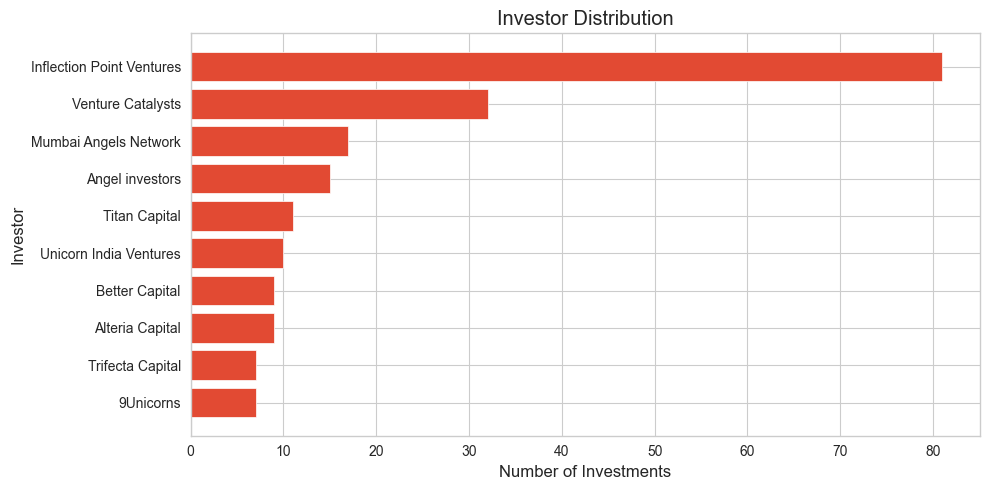

In [114]:
# lets see the distribution of the top 10 investors
plt.figure(figsize=(10, 5))
plt.barh(investor_count.index, investor_count.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Investor Distribution')
plt.tight_layout()  # To prevent the labels from getting cut off
plt.show();

### Inflection Point Ventures is the highest investor with 81 startups followed by Venture Catalysts and Mumbai Angels Network with 32 and 17 startups respectively.

### 4.2.7 Analysis of the founded attribute

In [115]:
df['Founded'].dtypes

dtype('float64')

In [116]:
# now lets have a look at the distribution of the founded column:
founded_year_count = df['Founded'].value_counts().sort_index().tail(11)
founded_year_count

Founded
2011.0     31
2012.0     45
2013.0     49
2014.0     95
2015.0    215
2016.0    868
2017.0    180
2018.0    233
2019.0    262
2020.0    256
2021.0     59
Name: count, dtype: int64

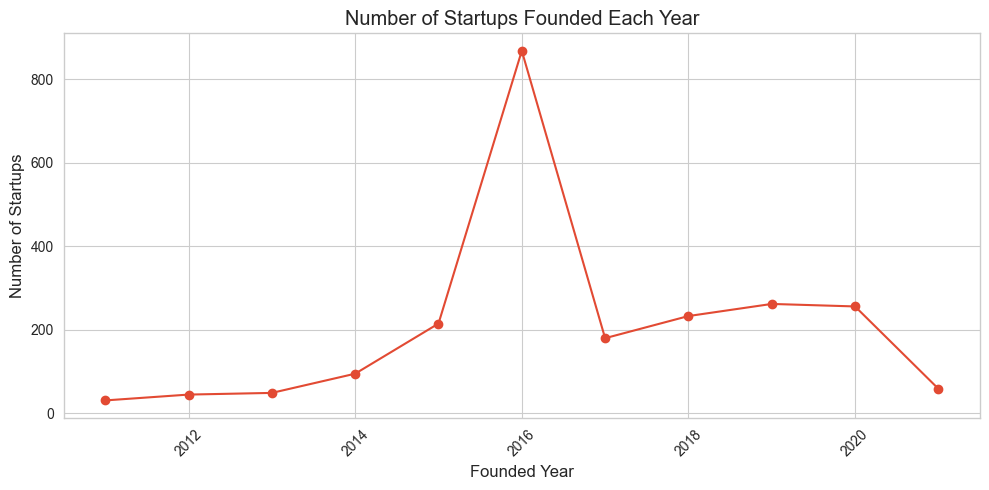

In [117]:
# lets see the distribution of the top 10 years which startups were founded

plt.figure(figsize=(10, 5))
plt.plot(founded_year_count.index, founded_year_count.values, marker='o', linestyle='-')
plt.xlabel('Founded Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Founded Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### from the chart most startups were started in 2016 and could be as a result of imputing the missing values with mode. we can deduce that between 2011 and 2016 the number of startups rose steadily within a plateau of about 600 startups in 2016. Numbers then declined in 2017 before rising steadly and again declining in 2020 with only 59 startups recorded in 2021.

In [118]:
df.shape

(2373, 11)

### 4.3 BIVARIATE ANALYSIS

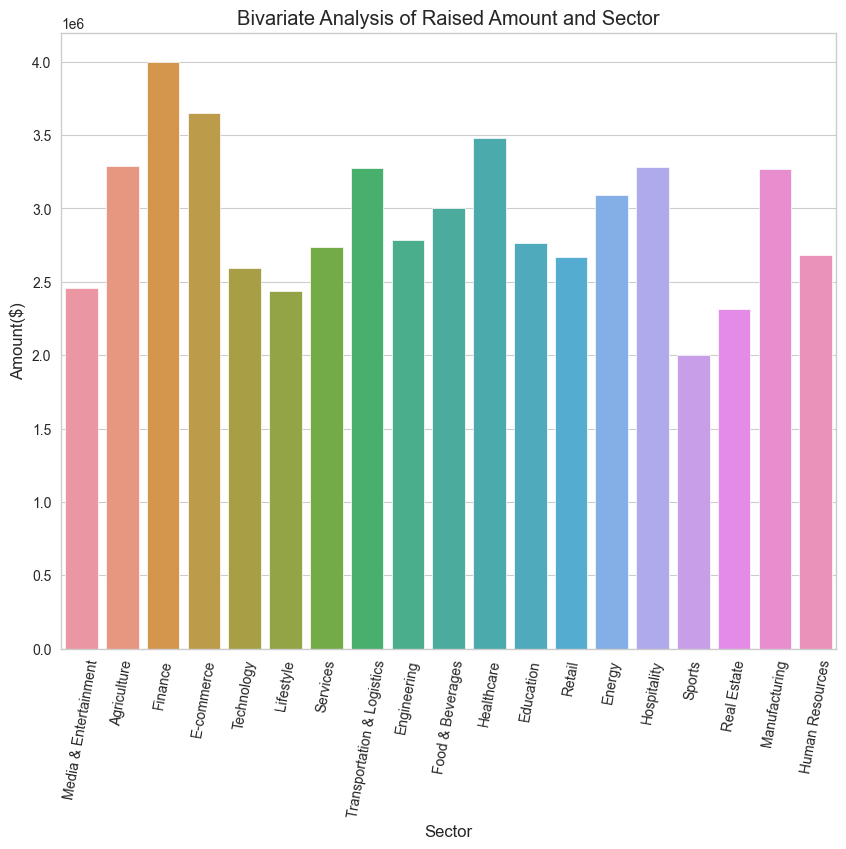

In [119]:
# now lets have a look at the relationship between sector and amount raised
plt.figure(figsize=(10, 8))
plt.xticks(rotation=80) 
sns.barplot(x=df['Sector'], y=df['Amount($)'], data=df, ci=None)
plt.title('Bivariate Analysis of Raised Amount and Sector')
plt.show()

### we can see that the average amount raised for most sectors is below $ 3000000. However, other sectors suuch as Finance. E-commerce and health have higher amounts raised above $3500000.

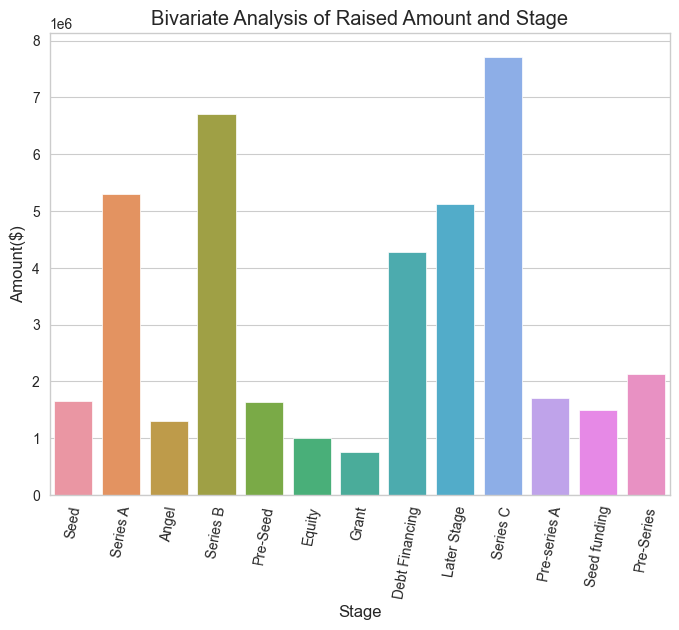

In [120]:
# now lets have a look at the relationship between stage and amount raised
df1=df[df['Stage'] != 'Unknown']
plt.figure(figsize=(8, 6))
plt.xticks(rotation=80) 
sns.barplot(x=df1['Stage'],y=df['Amount($)'], data=df, ci=False)
plt.title('Bivariate Analysis of Raised Amount and Stage')
plt.show()

### we can see that the average amount raised in most stages is below $2000000, with highest amounts raised at the series C, series B and series A stages, as well as later stages and debt financing. we can deduce that at series C a startup has likely achieved significant growth and success, which makes it more appealing to investors.

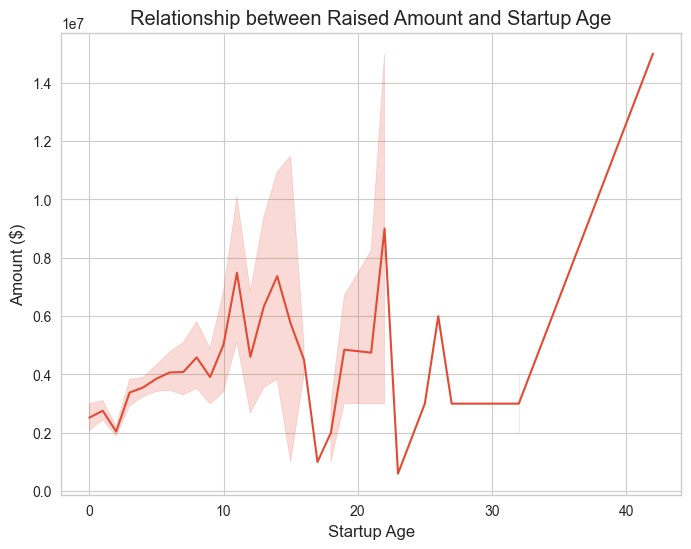

In [121]:
# now lets look at the relationship between age of startup and amount raised
plt.figure(figsize=(8, 6))
plt.xticks(rotation=0) 
sns.lineplot(x=df['Startup_Age'], y=df['Amount($)'])
plt.title('Relationship between Raised Amount and Startup Age')
plt.xlabel('Startup Age')
plt.ylabel('Amount ($)')
plt.show()

### we can see a gradual increase in the amount raised between 2-11 years, before the amount start reducing. we can conclude that startups raise highest amounts after 10 years, as they have likely achieved significant growth and success, which makes it more appealing to investors. after age 32, the amount raised start increasing as the startup have achieved ultimate growth.

In [122]:
# now lets look at the relationship between stage of funding and startup sector
# Create a cross-tabulation (contingency table)
filtered3_df = df[df['Stage'] != 'Unknown']
cross_table = pd.crosstab(df['Sector'], filtered3_df['Stage'])

# Display the cross-tabulation
print(cross_table)

Stage                       Angel  Debt Financing  Equity  Grant  Later Stage  \
Sector                                                                          
Agriculture                     0               4       0      0            0   
E-commerce                      2               5       1      0            1   
Education                       1               3       0      0            2   
Energy                          1               0       0      0            0   
Engineering                     3               0       1      0            0   
Finance                         8              22       2      0           10   
Food & Beverages                4               1       0      0            1   
Healthcare                      5               2       1      0            0   
Hospitality                     0               0       0      0            3   
Human Resources                 0               0       0      0            0   
Lifestyle                   

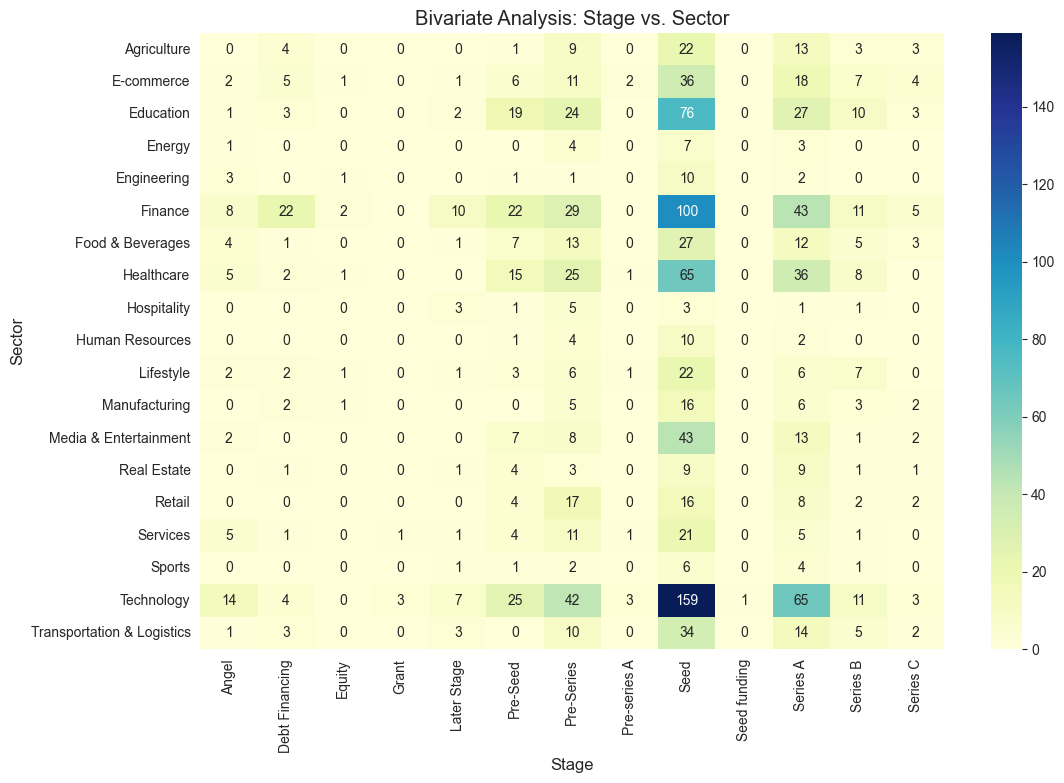

In [123]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Bivariate Analysis: Stage vs. Sector')
plt.xlabel('Stage')
plt.ylabel('Sector')
plt.show()

### we can see that in most sectors, startups are funded at the seed stage, which is an early stage of funding that typically comes after the initial startup capital, which often comes from the founders' own savings or contributions from friends and family. we can also see that a few sectors are funded at the series A, pre-series and pre-seed stages stage where the startup has demonstrated some level of success and progress, proving its business model and gaining some traction in the market. only a handful sectors are funded at Angel stage and are mainly in the technology sector.

In [124]:
df.shape

(2373, 11)

## 4.4 MULTIVARIATE ANALYSIS

In [125]:
df.columns

Index(['Company/Brand', 'Stage', 'Amount($)', 'HeadQuarter', 'What_it_does',
       'Sector', 'Funding_Year', 'Founded', 'Founders', 'Investor',
       'Startup_Age'],
      dtype='object')

<Axes: >

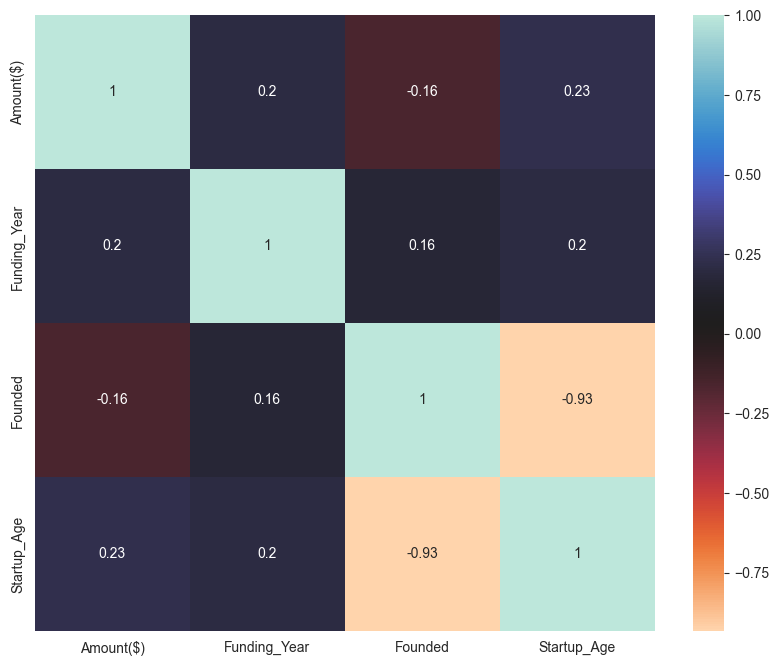

In [126]:
# now lets look at the relationship between numeric columns
# select numeric columns
df1=df.drop(['Company/Brand', 'Stage','HeadQuarter', 'What_it_does', 'Sector','Founders','Investor'], axis=1)

correlation = df1.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot = True,cmap='icefire_r')

In [127]:
# performing feature selection
coff=abs(correlation['Amount($)'])
coff=coff[coff>0.02]
coff.sort_values(ascending=False)

Amount($)       1.000000
Startup_Age     0.229942
Funding_Year    0.201116
Founded         0.158393
Name: Amount($), dtype: float64

### from the heatmap above and correlation coeficients, we can deduce that the amount raised is more correlated to the age of the startup.

## 5. Evaluation
### Aswering the business questions

1.	To what extent do cities influence funding?

In [128]:
cities_grp = df.groupby('HeadQuarter')['Amount($)'].sum().reset_index()
top_10_locations = cities_grp.sort_values(by = 'Amount($)', ascending = False).head(10)
top_5_locations = cities_grp.sort_values(by = 'Amount($)', ascending = False).head(5)
top_10_locations

,HeadQuarter,Amount($)
7,Bangalore,2.741151e+09
62,Mumbai,1.241584e+09
33,Gurugram,6.600285e+08
65,New Delhi,5.302770e+08
17,Chennai,3.011281e+08
78,Pune,2.589871e+08
21,Delhi,2.121522e+08
68,Noida,1.931570e+08
32,Gurgaon,1.778530e+08
38,Hyderabad,1.669010e+08


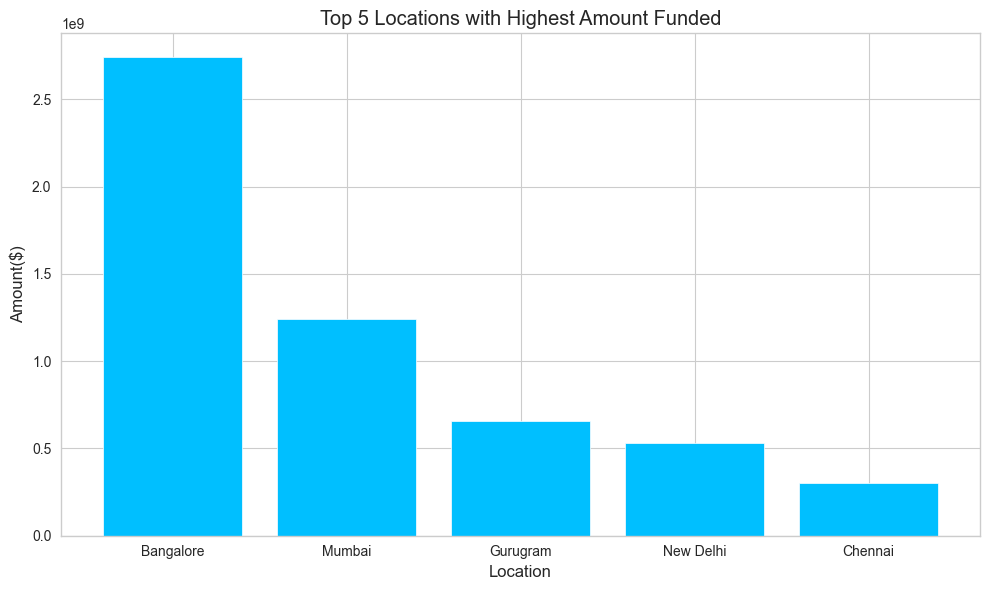

In [129]:
# lets visualize the top 5 locations
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(top_5_locations['HeadQuarter'], top_5_locations['Amount($)'], color='deepskyblue')
plt.xlabel('Location')
plt.ylabel('Amount($)')
plt.title('Top 5 Locations with Highest Amount Funded')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()






In [130]:
df.shape

(2373, 11)

### Bangalore is leading when it comes to startup funding with about $2,741,151,000 total investments, and is the third largest city in India with a population of about 8,443,675. Mumbai, which is the largest city follows closely with about $1,241,584,000 total investments.

## 2.	Which Sectors are preferred by investors for funding?

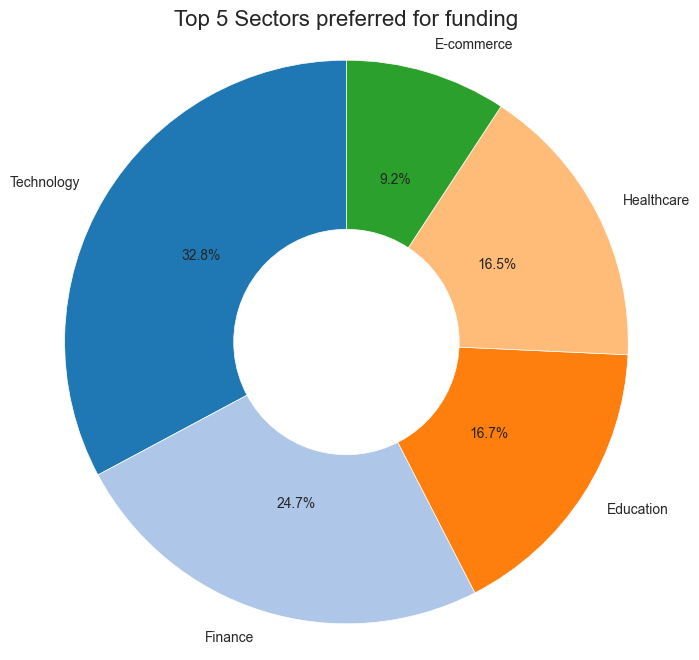

In [131]:
# lets visualize the top 5 sectors
plt.figure(figsize=(8, 8))
plt.pie(sector_count.values, labels=sector_count.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.gca().add_artist(plt.Circle((0,0),0.40,fc='white'))  # White circle in the center to create the doughnut effect
plt.title('Top 5 Sectors preferred for funding', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Technology is the most preffered sector with about 32.8% startups followed by technology with 24.7% established startups. Education, healthcare and e-commerce are also preffered with 16.7%, 16.5% and 9.2% startups respectively.

## 3.	At which stage do start-ups get more funding from investors?

In [132]:
# lets look at the stages that get more funding
stage_grp = df.groupby('Stage')['Amount($)'].sum().reset_index()
top_5_stages = stage_grp.sort_values(by = 'Amount($)', ascending = False).head(6)
top_5_stages = top_5_stages[top_5_stages['Stage'] != 'Unknown']
top_5_stages

,Stage,Amount($)
10,Series A,1.519090e+09
8,Seed,1.133026e+09
11,Series B,5.158370e+08
6,Pre-Series,4.882044e+08
12,Series C,2.315597e+08


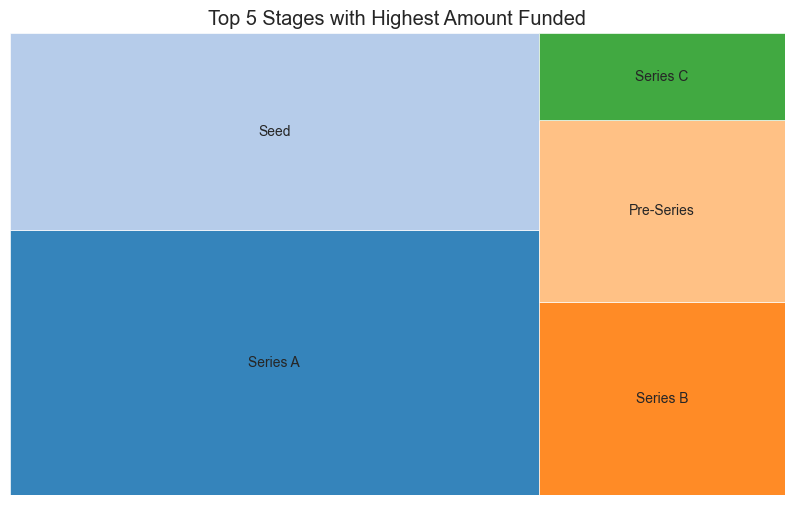

In [133]:
# lets visualize the top 5 stages
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_5_stages['Amount($)'], label=top_5_stages['Stage'], alpha=0.9, color=plt.cm.tab20.colors)
plt.axis('off')
plt.title('Top 5 Stages with Highest Amount Funded')
plt.show()

### we can see at at series A stage startups raise highest amounts.The high amount is because at series A, the startup has typically demonstrated some market traction, has a minimum viable product (MVP), and has gained initial customers. we can also see that a high amount raised at the seed stage as startups typically seek funding from angel investors, friends and family, and sometimes venture capital firms that focus on early-stage investments. lastly, we can also see that a significant amount is raised at series B, Pre-series and series C stages.

## 4.	What is the typical funding amount that startups receive in India?

In [134]:
# lets look at the typical funding of indian startups by sector
sector_grp = df.groupby('Sector')['Amount($)'].sum().reset_index()
sectors = sector_grp.sort_values(by = 'Amount($)', ascending = False)
sectors5 = sector_grp.sort_values(by = 'Amount($)', ascending = False).head(5)
sectors

,Sector,Amount($)
5,Finance,1.474923e+09
17,Technology,1.271999e+09
7,Healthcare,8.555599e+08
2,Education,6.918947e+08
1,E-commerce,5.033768e+08
18,Transportation & Logistics,3.374857e+08
6,Food & Beverages,3.362083e+08
12,Media & Entertainment,2.872050e+08
0,Agriculture,2.599000e+08
14,Retail,2.296820e+08


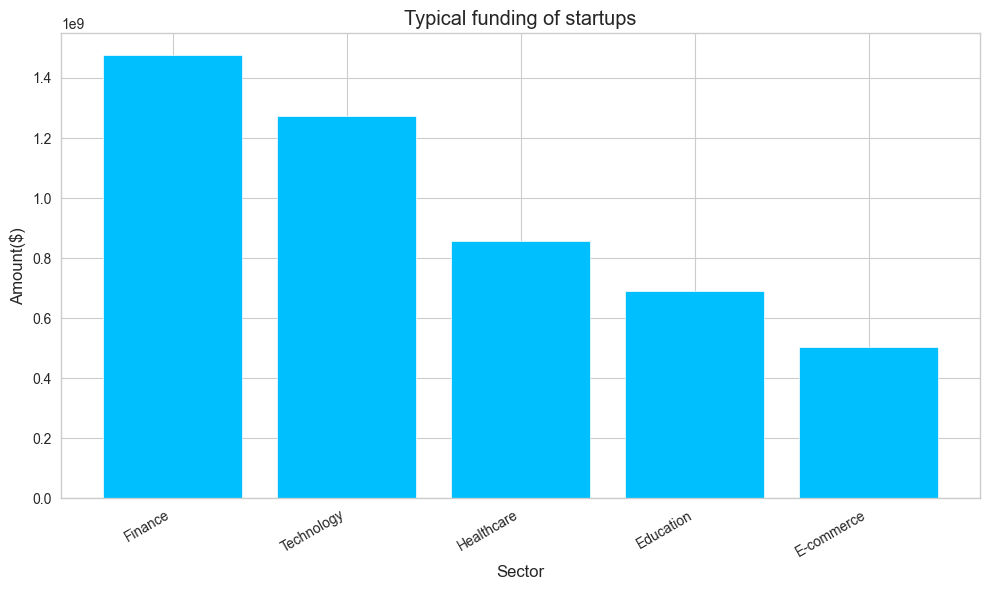

In [135]:
# lets visualize the funding of startups
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(sectors5['Sector'], sectors5['Amount($)'], color='deepskyblue')
plt.xlabel('Sector')
plt.ylabel('Amount($)')
plt.title('Typical funding of startups')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### in the indian startup, the typical funding amount varies across sectors, where finance and technology receive the highest amounts of about $1,474,923,000 and $1,271,999,000 respectively. on the other hand, healthcare, education and e-commerce also receive significant amounts of funding.  other sectors such as hospitality, sports and engineering sectors are least funded with amounts less than $29,380,000.

## 5.	Which type of investors invest the most money?

In [136]:
# lets look at the investors that invest most money
investor_grp = df.groupby('Investor')['Amount($)'].sum().reset_index()
investors = investor_grp.sort_values(by = 'Amount($)', ascending = False).head(6)
investors = investors[investors['Investor'] != 'unknown']
investors

,Investor,Amount($)
566,Inflection Point Ventures,150925000.0
1311,Venture Catalysts,85000000.0
1078,Sequoia Capital India,57400000.0
394,Elevation Capital,41100000.0
1094,Sequoia India,40500000.0


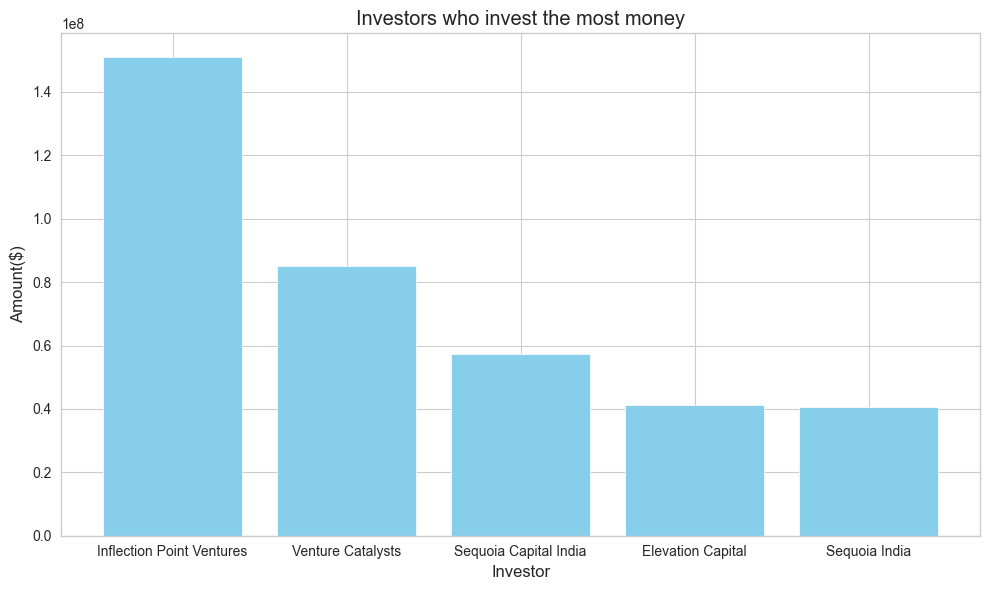

In [137]:
# lets visualize the investors
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(investors['Investor'], investors['Amount($)'], color='skyblue')
plt.xlabel('Investor')
plt.ylabel('Amount($)')
plt.title('Investors who invest the most money')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

### Inflection Point Ventures are the top investors with about $124,925,000 investtments, followed by venture catalysts and Elevation capital with $85,000,000 and $41,100,000 investments respectively. Mumbai Angels network and Chiratae ventures have also invested $34,113,500 and $32,700,000 respectively. 

## 6. Can the age of the startup affect the amount received from investors ?

In [138]:
# lets look at the amount received according to the age of the startup
age_grp = df.groupby('Startup_Age')['Amount($)'].sum().reset_index()
age = age_grp.sort_values(by = 'Amount($)', ascending = False).head(10)
age

,Startup_Age,Amount($)
2,2.0,1.558603e+09
4,4.0,1.417816e+09
1,1.0,8.845400e+08
5,5.0,8.097563e+08
3,3.0,6.927439e+08
6,6.0,5.412927e+08
7,7.0,2.695105e+08
0,0.0,2.621255e+08
8,8.0,2.109711e+08
9,9.0,1.290800e+08


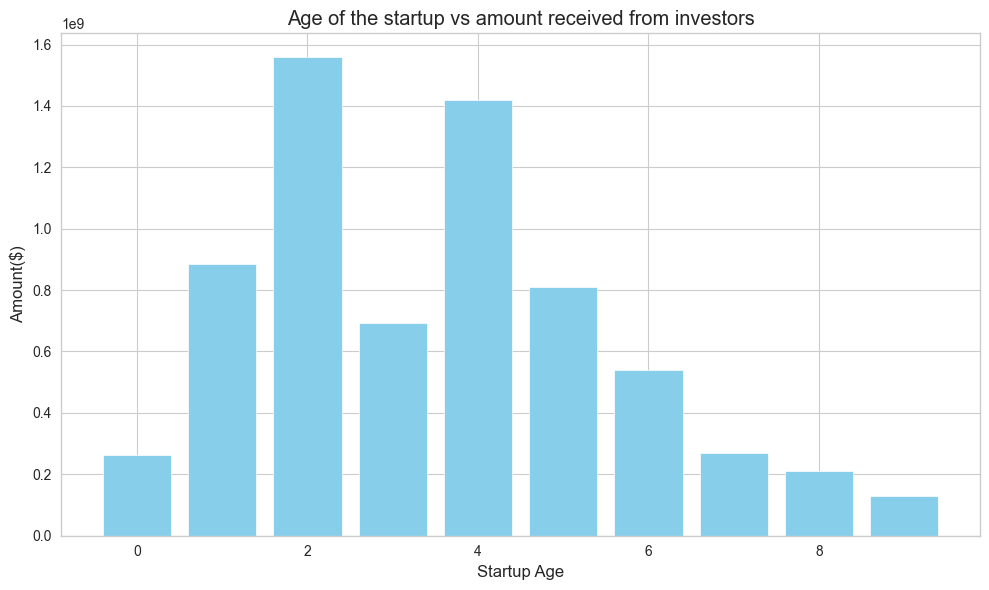

In [139]:
# lets visualize how the age of the startup affect funding

plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(age['Startup_Age'], age['Amount($)'], color='skyblue')
plt.xlabel('Startup Age')
plt.ylabel('Amount($)')
plt.title('Age of the startup vs amount received from investors')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()    

###  although the relationship is complex, we can see that most startups are highly funded between 1 and 5 years of establishment 

## 6. Hypothesis Testing

### Null: The location of a startup doesn’t affect the amount of funding received from investors.
### Alternate: the location of a startup significantly affects the amount of funding issued by investors.


In [140]:
#Test Hypothesis with Kruskal-Wallis Test
# Group data by location
grouped_data = df.groupby('HeadQuarter')['Amount($)'].apply(list)

# Perform Kruskal-Wallis Test
result = stats.kruskal(*grouped_data)

# Interpret the results
alpha = 0.05  # Set the significance level
p_value = result.pvalue

if p_value < alpha:
    print("Reject the null hypothesis (H_o). The location of a business affects the amount of funding received.")
else:
    print("Fail to reject the null hypothesis (H_o). The location of a business does not affect the amount of funding received.")

Reject the null hypothesis (H_o). The location of a business affects the amount of funding received.


### we therefore reject the null hypothesis and conclude that the location of a business affects the amount of funding issued by investors